In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
def load_raw_data(file):
    filePath = Path('C:\\Temp\\MRes\\training_data', file)
    data = pd.read_csv(filePath)
    return data

def feature_target(data):
    #data = data.drop(columns=['geometry'])
    X, y = data.iloc[:,1:], data['GENUS']
    return(X, y)

def hyperparameter_tuning(estimator, param_grid, X_train, y_train):
    CV = GridSearchCV(estimator = estimator, param_grid = param_grid, cv= 5, verbose=10, n_jobs=-1)
    CV.fit(X_train, y_train)
    print(CV.best_params_)

def train_SVM( X_train, y_train):
    model = SVC(C=10, kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_RF(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def train_AB(X_train, y_train):
    model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return model, y_pred

def print_metrics(y_test, y_pred, X_test, model):
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('F1:', metrics.f1_score(y_test, y_pred, average='weighted'))
    print('Precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print('Recall:', metrics.precision_score(y_test, y_pred, average='weighted'))

def conf_matrix(model, X_test, y_test, file):
    fig, ax = plt.subplots(figsize=(7, 7))
    plot_confusion_matrix(model, X_test, y_test, ax=ax)
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath, bbox_inches='tight')
    plt.show()
    
def feature_importance_rank(model, model_name, file):
    fig, ax = plt.subplots(figsize=(10, 7))
    skplt.estimators.plot_feature_importances(model, feature_names = col_heads, title=model_name, max_num_features = 10, ax=ax)
    ax.set_ylabel('Importance')
    plt.xticks(rotation=45, ha="right")
    filePath = Path('C:\\Temp\\MRes\\Figures', file)
    plt.savefig(filePath, bbox_inches='tight')
    plt.show()
    
def output_performance_report(y_test, y_pred, file):
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    filePath = Path('C:\\Temp\\MRes\\tree_class_results', file)
    df.to_csv(filePath)

In [6]:
# Parameter grids

param_grid_rf = { 
    'n_estimators': [10, 100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
}

param_grid_sv = { 
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['poly', 'rbf'],
    #'gamma' : ['scale', 'auto'],
}

param_grid_ada = { 
    'n_estimators': [10, 100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
}

# Classifiers

rfc = RandomForestClassifier(random_state=42)
sv = SVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

In [6]:
# Load the dataset
data = load_raw_data('lidar_features.csv')

# Split the data into features (X) and target (y)
X, y = feature_target(data)
col_heads = list(X.columns.values.tolist())

# Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
hyperparameter_tuning(ada, param_grid_ada, X_train, y_train)

In [ ]:
hyperparameter_tuning(rfc, param_grid_rf, X_train, y_train)

In [ ]:
hyperparameter_tuning(sv, param_grid_sv, X_train, y_train)

In [ ]:
# Select best parameters for each algorithm

hyperparameter_tuning(sv, param_grid_sv, X_train, y_train)

hyperparameter_tuning(rfc, param_grid_rf, X_train, y_train)

hyperparameter_tuning(ada, param_grid_ada, X_train, y_train)

Accuracy: 0.4928909952606635
F1: 0.35120865122925704
Precision: 0.27636944781219003
Recall: 0.27636944781219003


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


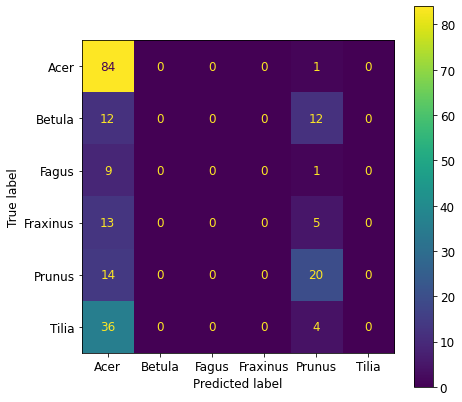

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
# Support Vector Machines

model, y_pred = train_SVM(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test, 'lidar_SVM.eps')

output_performance_report(y_test, y_pred, 'SVM_lidar.csv')

Accuracy: 0.6018957345971564
F1: 0.5692283013456788
Precision: 0.5690557129662891
Recall: 0.5690557129662891


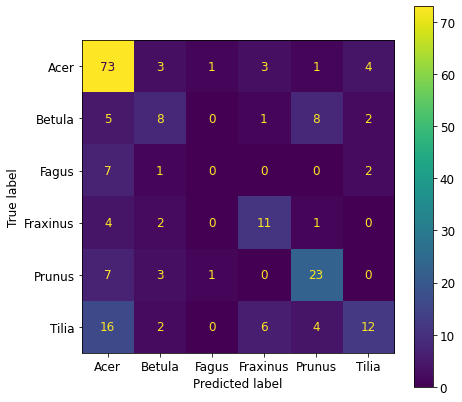

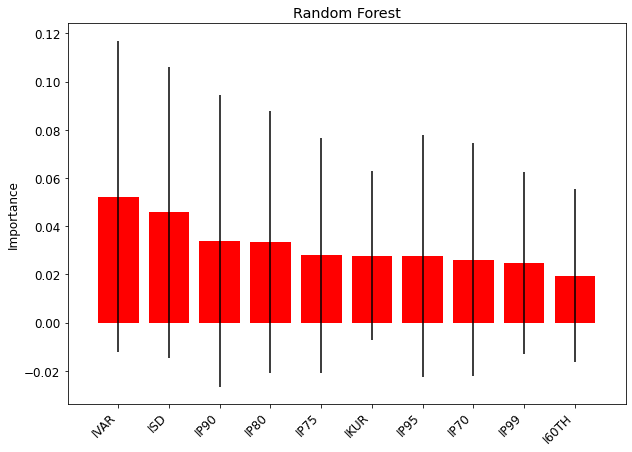

In [10]:
# Random Forest

model, y_pred = train_RF(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test, 'lidar_RF.eps')

feature_importance_rank(model, 'Random Forest', 'lidar_RF_feature_rank.eps')

output_performance_report(y_test, y_pred, 'RF_lidar.csv')

Accuracy: 0.5450236966824644
F1: 0.4576166890357812
Precision: 0.4807148041745198
Recall: 0.4807148041745198


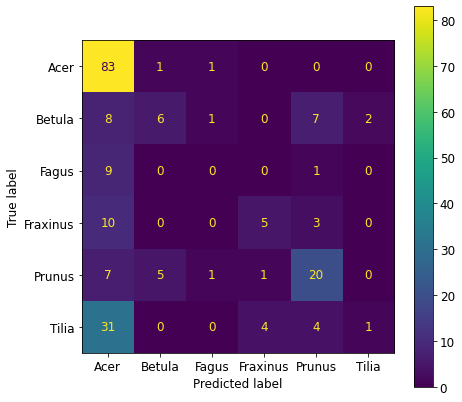

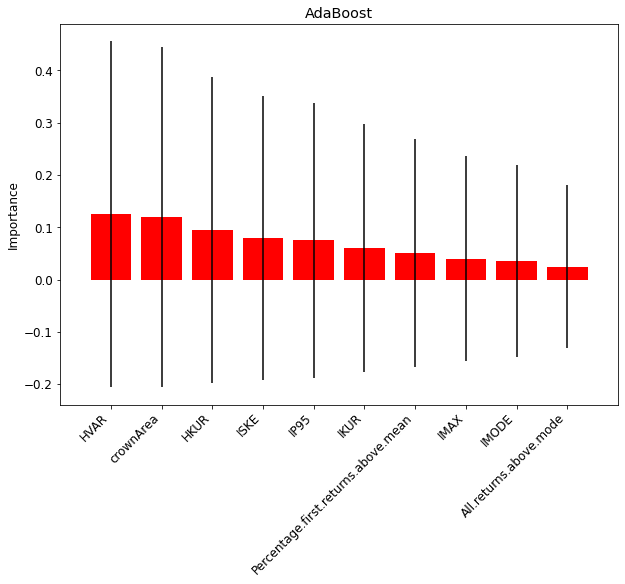

In [12]:
# AdaBoost

model, y_pred = train_AB(X_train, y_train)

print_metrics(y_test, y_pred, X_test, model)

conf_matrix(model, X_test, y_test,'lidar_AB.eps')

feature_importance_rank(model, 'AdaBoost', 'lidar_AB_feature_rank.eps')

output_performance_report(y_test, y_pred, 'AB_lidar.csv')